In [34]:
import os
import sys
from collections import OrderedDict

import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from scipy import stats
from scipy.io import mmread, mmwrite
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize, scale


def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "k-", alpha=0.75, zorder=0)
    ax.set_aspect("equal")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax


fsize = 15

base_figure_path = "figures"

alpha = 0.33

import matplotlib

matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["font.size"] = fsize
%config InlineBackend.figure_format = 'retina'

In [58]:
fns = [
    "synchromesh/data/size_raw.txt",
    "synchromesh/data/size_log1p.txt",
    "synchromesh/data/size_sctransform.txt",
    "synchromesh/data/size_scalelog1pCP10k.txt"
]

In [59]:
df = []
for fn in fns:
    df.append(pd.read_csv(
        fn,
        header=None,
        sep="\t",
        names=["ds", "normalization", "ncells", "nbytes"],
    ))
df = pd.concat(df)

In [60]:
df

,ds,normalization,ncells,nbytes
0,10xv3_hek_293t,raw,2378,163456505
1,10xv3_nih_3t3,raw,2458,118781006
2,10xv3_pbmc,raw,1222,28712203
3,angelidis_2019,raw,14813,84100869
4,CRX102285,raw,8991,289202382
...,...,...,...,...
521,SRX4733403,scalelog1pCP10k,6670,2375077494
522,SRX4733411,scalelog1pCP10k,2031,1032510066
523,svensson_2017_1,scalelog1pCP10k,2000,538673173
524,svensson_2017_2,scalelog1pCP10k,2000,548619447


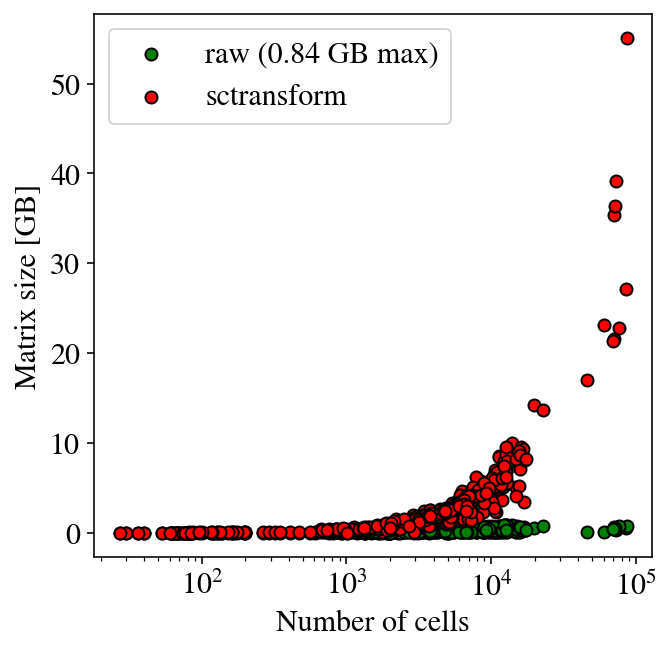

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))

x = df.query("normalization == 'raw'")["ncells"]
y = df.query("normalization == 'raw'")["nbytes"] / 1e9
mx = y.max()
ax.scatter(x, y, label=f"raw ({mx:,.2f} GB max)", edgecolor="k", facecolor="green")


y = df.query("normalization == 'sctransform'")["nbytes"] / 1e9
ax.scatter(x, y, label="sctransform", edgecolor="k", facecolor="red")

ax.set(
    **{
        "xlabel": "Number of cells",
        "ylabel": "Matrix size [GB]",
        "xscale": "log",
    }
)

ax.legend()


# base_file_name = "memory"
# save_path = os.path.join(base_figure_path, base_file_name)
# if not os.path.exists(save_path):
#     os.makedirs(save_path)

# fig.savefig(
#     os.path.join(save_path, f"{base_file_name}.png"),
#     facecolor="white",
#     transparent=False,
#     dpi=300,
#     bbox_inches="tight",
# )
# fig.savefig(
#     os.path.join(save_path, f"{base_file_name}.pdf"), dpi=300, bbox_inches="tight"
# )

fig.show()

In [62]:
assert 0 == (df.query("normalization == 'scalelog1pCP10k'")["ds"] != df.query("normalization == 'raw'")["ds"]).sum()

In [63]:
fc = df.query("normalization == 'scalelog1pCP10k'")["nbytes"] / df.query("normalization == 'log1p'")["nbytes"]
fc.index = df.query("normalization == 'scalelog1pCP10k'")["ds"]

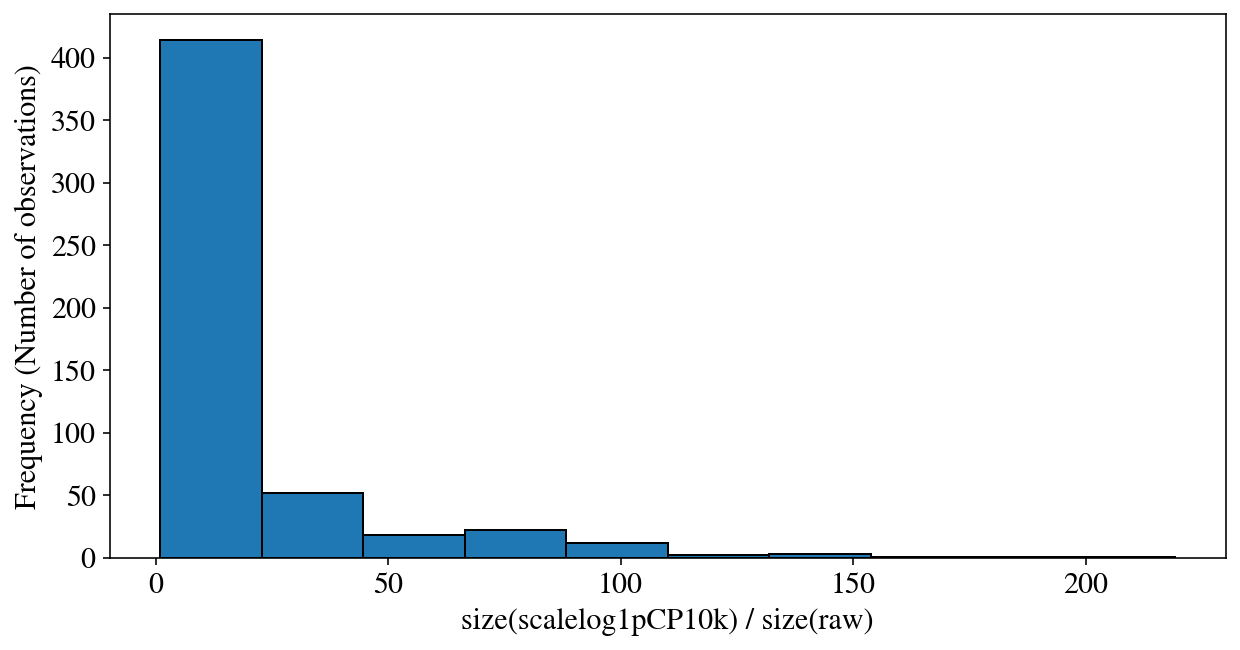

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

x = fc.values

ax.hist(x, edgecolor="k")

ax.set(
    **{
        "xlabel": "size(scalelog1pCP10k) / size(raw)",
        "ylabel": "Frequency (Number of observations)",
    }
)
fig.show()

In [65]:
fc.mean()

20.86386029086204

In [66]:
fc.sort_values()

ds
macosko_2015             1.032123
zheng_2017               1.246517
padovan_merhar_2015      1.274086
klein_2015               1.622348
GSM3773121               2.253636
                          ...    
GSM3576400             135.353980
ERS4228662             141.531623
ERX2756729             156.118960
GSM3711764             196.637535
ERX2756720             219.214318
Name: nbytes, Length: 526, dtype: float64